<a href="https://colab.research.google.com/github/kapil9/data-project-1/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)
K nearest neighbors (KNN) is a supervised machine learning algorithm. A supervised machine learning algorithm’s goal is to learn a function such that f (X) = Y where X is the input, and Y is the output. KNN can be used both for classification as well as regression.

In this example we have a response to advertisement according to age and salary. The file has 1883 records.

## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving frequency_response_vis-a-vis_salaries.csv to frequency_response_vis-a-vis_salaries.csv


In [3]:
dataset = pd.read_csv('frequency_response_vis-a-vis_salaries.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)

[[   19 19000]
 [   35 20000]
 [   26 43000]
 ...
 [   50 20000]
 [   36 33000]
 [   49 36000]]


In [4]:
print(y)

[0 0 0 ... 1 0 1]


## Split the dataset into Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
print(X_train)

[[   30 89000]
 [   24 89000]
 [   25 80000]
 ...
 [   60 46000]
 [   40 59000]
 [   38 80000]]


In [6]:
print(y_train)

[1 0 1 ... 0 1 1]


In [7]:
print(X_test)

[[    25  87000]
 [    22  27000]
 [    40  57000]
 [    27  89000]
 [    19  76000]
 [    46  88000]
 [    49  89000]
 [    20  23000]
 [    33  31000]
 [    33  51000]
 [    35  23000]
 [    30  80000]
 [    36  50000]
 [    30  79000]
 [    46  28000]
 [    46  82000]
 [    29  61000]
 [    57  33000]
 [    30  80000]
 [    39  79000]
 [    22  81000]
 [    51 146000]
 [    47  20000]
 [    41  71000]
 [    18  52000]
 [    33  51000]
 [    44 139000]
 [    18  68000]
 [    39  59000]
 [    33  31000]
 [    24  58000]
 [    49  39000]
 [    27  96000]
 [    50  20000]
 [    39  77000]
 [    29  83000]
 [    35  75000]
 [    38  65000]
 [    21  72000]
 [    46  32000]
 [    27  84000]
 [    30 116000]
 [    32 117000]
 [    40  59000]
 [    35  73000]
 [    36  33000]
 [    42 108000]
 [    30  62000]
 [    38  61000]
 [    37  62000]
 [    44 139000]
 [    28  79000]
 [    34 112000]
 [    49  36000]
 [    45  26000]
 [    48  30000]
 [    43 129000]
 [    31  89000]
 [    33  3100

In [8]:
print(y_test)

[0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[-0.81698595 -1.4453287 ]
 [-0.6307253   0.52697188]
 [ 0.48683861 -0.22438072]
 ...
 [ 0.57996894 -0.38091252]
 [ 2.16318448  0.68350367]
 [-0.07194334 -1.35140963]]


In [11]:
print(X_test)

[[-1.0032466   0.65219731]
 [-1.28263758 -1.22618419]
 [ 0.39370829 -0.28699344]
 [-0.81698595  0.71481003]
 [-1.56202855  0.30782737]
 [ 0.95249024  0.68350367]
 [ 1.23188122  0.71481003]
 [-1.46889823 -1.35140963]
 [-0.25820399 -1.10095876]
 [-0.25820399 -0.47483159]
 [-0.07194334 -1.35140963]
 [-0.53759497  0.4330528 ]
 [ 0.02118698 -0.50613795]
 [-0.53759497  0.40174644]
 [ 0.95249024 -1.19487784]
 [ 0.95249024  0.49566552]
 [-0.6307253  -0.16176801]
 [ 1.97692382 -1.03834604]
 [-0.53759497  0.4330528 ]
 [ 0.30057796  0.40174644]
 [-1.28263758  0.46435916]
 [ 1.41814187  2.49927246]
 [ 1.04562057 -1.4453287 ]
 [ 0.48683861  0.15129558]
 [-1.65515888 -0.44352523]
 [-0.25820399 -0.47483159]
 [ 0.76622959  2.28012795]
 [-1.65515888  0.0573765 ]
 [ 0.30057796 -0.22438072]
 [-0.25820399 -1.10095876]
 [-1.09637692 -0.25568708]
 [ 1.23188122 -0.85050789]
 [-0.81698595  0.93395454]
 [ 1.32501154 -1.4453287 ]
 [ 0.30057796  0.33913373]
 [-0.6307253   0.52697188]
 [-0.07194334  0.27652101]
 

## Train the K-NN model on the Training set

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predict a new result 

In [13]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predict the Test set results

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]

## Make the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[331  30]
 [ 60  50]]


0.8089171974522293

## Visualize the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


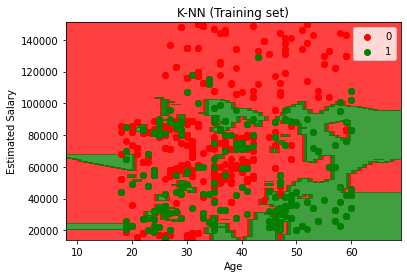

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualize the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


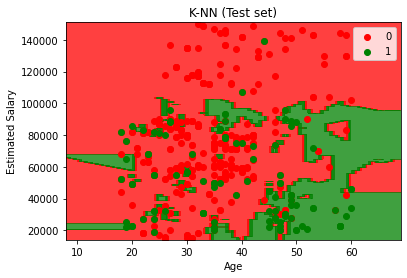

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()